In [1]:
# ======================= Importing libraries ===================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ====================== Reading data from Dataset =======================
df=pd.read_csv('C:/Users/faiza/Desktop/voicegender/voice.csv');
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
#print the actual data
df.head()
print("shape of data:-",df.shape)
print("Total number of labels:{}".format(df.shape[0]))
print("Number of Male:{}".format(df[df.label == 'male'].shape[0]))
print("Number of Female:{}".format(df[df.label == 'female'].shape[0]))

shape of data:- (3168, 21)
Total number of labels:3168
Number of Male:1584
Number of Female:1584


In [8]:
#print shape of data
x=df.iloc[:,:-1]
print(df.shape)
print(x.shape)

(3168, 21)
(3168, 20)


In [14]:
#import LabelEncoder librabry:-
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
gender=LabelEncoder()
y=gender.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)


In [20]:
#print test and train shape
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

print("X_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (2217, 20)
y_train shape: (2217,)
X_test shape: (951, 20)
y_test shape: (951,)


In [21]:

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

svc_model=SVC()
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print('Accuracy Score:-')
print(metrics.accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


Accuracy Score:-
0.9737118822292324
[[458  13]
 [ 12 468]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.97      0.97      0.97       480

   micro avg       0.97      0.97      0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [25]:
#Apply Logistic Regression :-
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy Score:-')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:-
0.9674027339642481


Test score for k=1: 97.4763%


Text(0, 0.5, 'Error Rate')

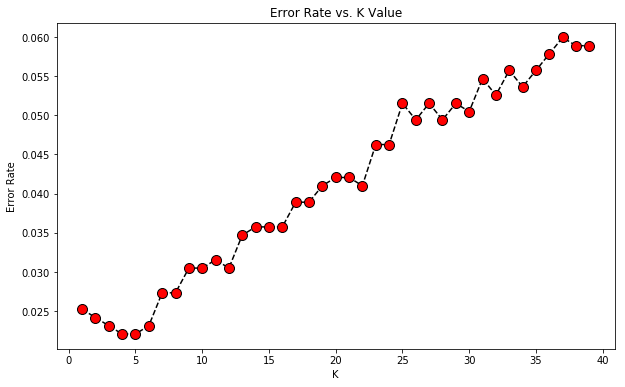

In [37]:
# KNeighborsClassifier :-
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
print("Test score for k=1: " + str(round((knn.score(x_test,y_test)*100), 4)) + '%')


error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_k = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_k != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
#After error_rate removal the test score k=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
print("Test score for k=5: " + str(round((knn.score(x_test,y_test)*100), 4)) + '%')

Test score for k=5: 97.7918%
